# <center>STUDENT AT PARYS SACLAY 27 NOVEMBER 2020</center>#
# <center> Programming Project Network Analysis</center>#
#  NAMES: PANONGBENE JEAN MOHAMED SAWADOGO #
# Email: amet1900@gmail.com #
# Github: https://github.com/Panongbene #

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from random import shuffle
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Requiere Function

## Compute The Execution Time

In [3]:
#https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost
def timer(start_time=None):
    """This function compute the execution time of algorithm"""
    
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        #print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

    return thour, tmin, round(tsec, 2)

## Degres Analysis of Graph

In [4]:
def stat_graph(G):
    """This function computhe average degre of a graph"""
    
    number_of_node = len(G.nodes())
    number_of_edges = len(G.edges())
    
    deg_seq = [G.degree(x) for x in nx.nodes(G)]
    cluster_coefficient = nx.clustering(G)
    
    average_degre = 0.0
    average_clustering_coeff = 0.0
    
    probability_degre_i = dict()
    dic_degre = dict()
    
    
    for i in cluster_coefficient:
        average_clustering_coeff+= cluster_coefficient[i]
    
    average_clustering_coeff = average_clustering_coeff/len(cluster_coefficient)
    
    for i in deg_seq:
        if i in dic_degre:
            dic_degre[i]+=1
        else:
            dic_degre[i]=1
            
    for i in dic_degre:
        probability_degre_i[i] = dic_degre[i]/number_of_node
        average_degre += i*probability_degre_i[i]
        
    return number_of_node, number_of_edges, deg_seq, probability_degre_i, average_degre, cluster_coefficient, average_clustering_coeff

# DATA

In [5]:
# Load the graph
G = nx.read_edgelist("data/wiki-Vote.txt")

# GRAPH ANALYSIS

In [6]:
number_of_node_G, number_of_edges_G, deg_seq_G, probability_degre_i_G, average_degre_G, cluster_coefficient_G, average_clustering_coeff_G = stat_graph(G)

##### Number of nodes and edges:

In [7]:
print("Number of nodes == ",number_of_node_G)
print("Number of edges == ",number_of_edges_G)

Number of nodes ==  7115
Number of edges ==  100762


##### Draw the graph using matplotlib

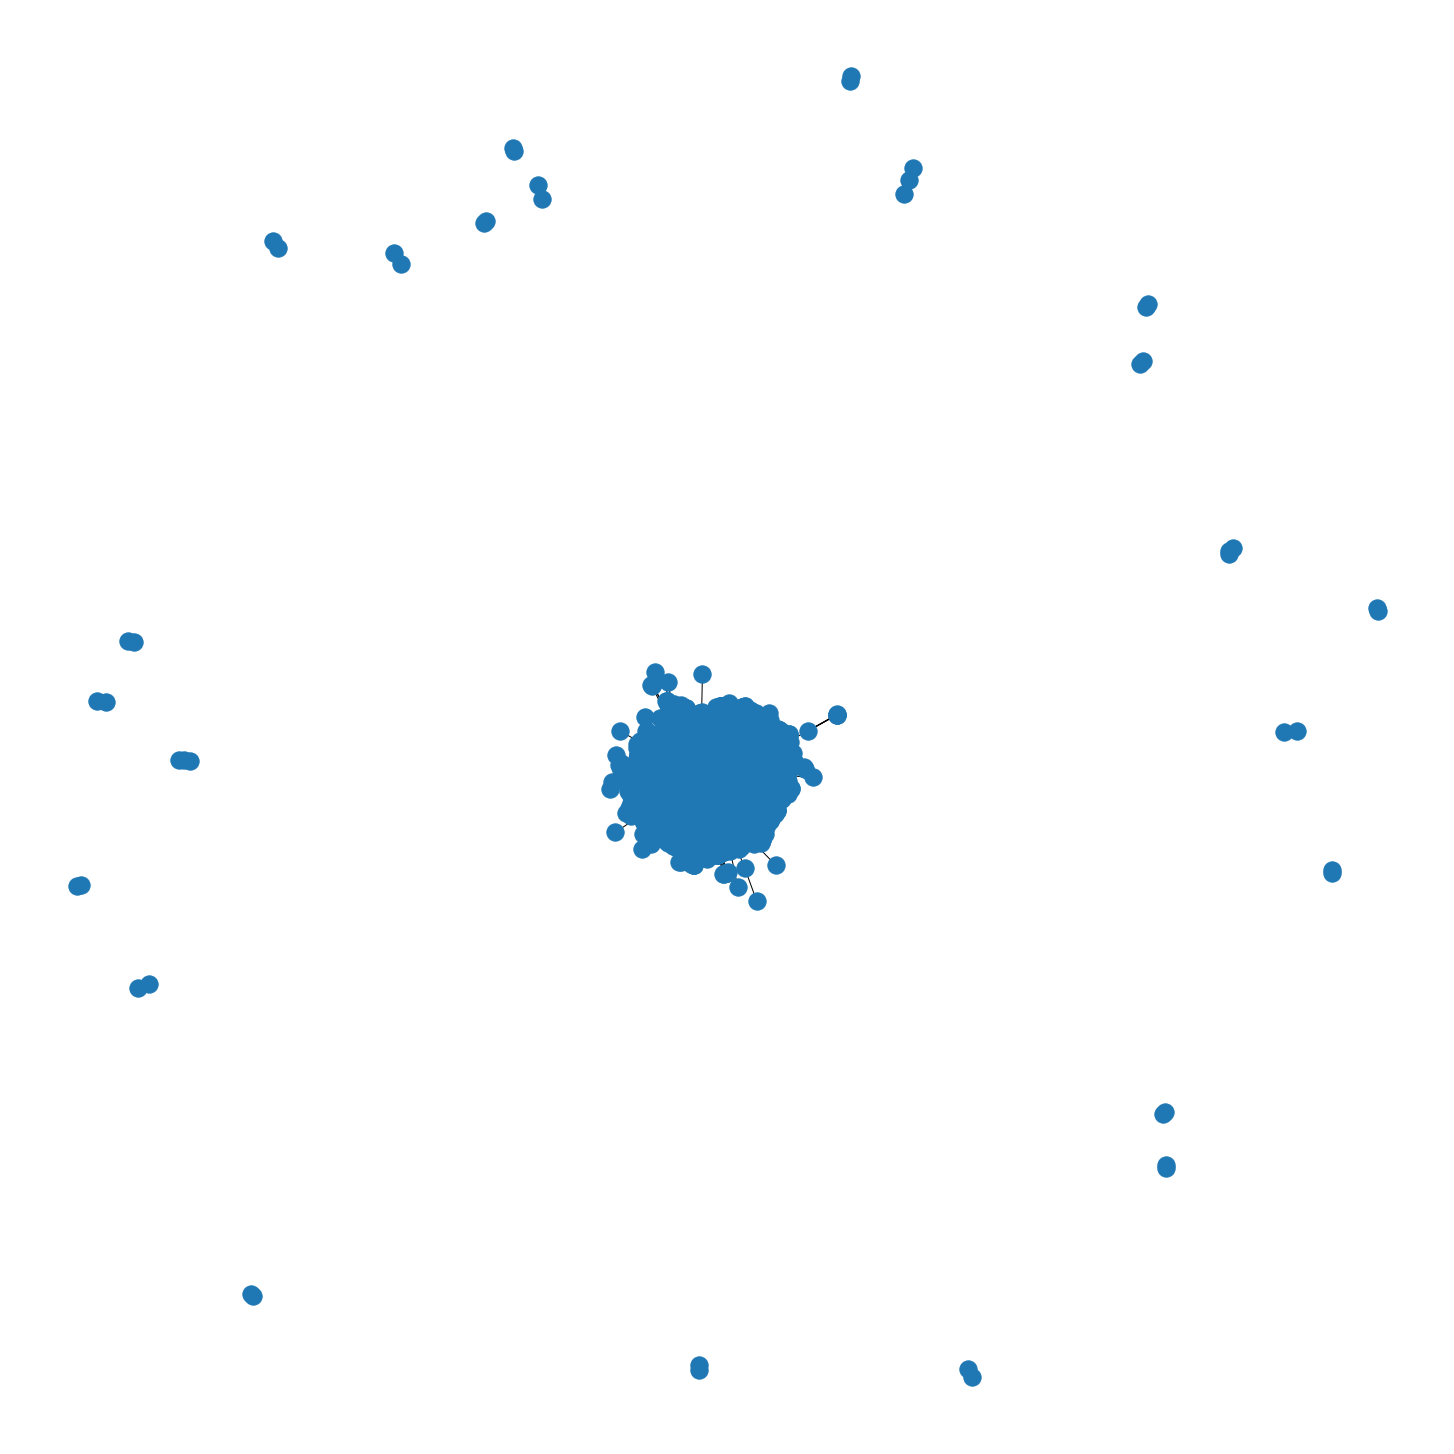

EXECUTION TIME == (0.0, 2.0, 17.83)


In [8]:
start_time = timer(None)
plt.figure(figsize=(20,20))
#nx.draw(G, node_color='r', node_size=1, with_labels=True)
nx.draw(G)
plt.savefig('graph.png')
plt.show()
print("EXECUTION TIME ==",timer(start_time))

## Degrees

##### Histogram of degrees

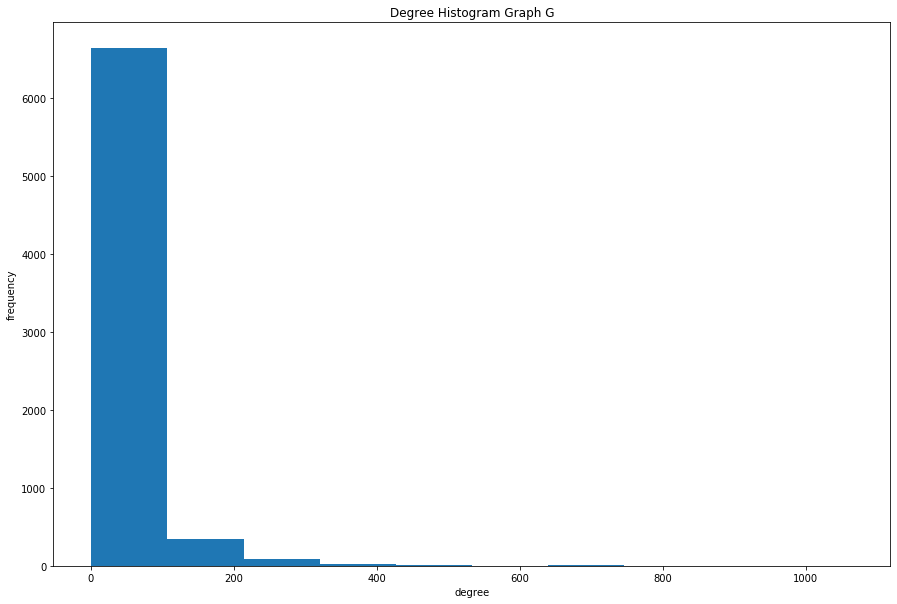

In [9]:
plt.figure(figsize=(15,10))

plt.hist(deg_seq_G)

plt.title('Degree Histogram Graph G')
plt.xlabel('degree')
plt.ylabel('frequency')
plt.savefig('histogram_of_degrees_graph_G.png')
plt.show()

##### Build Random Graph With the same average degre of G graph

In [10]:
print("Average degre of G = ", average_degre_G)

Average degre of G =  28.323822909346458


In [11]:
# compute the probability p
p = average_degre_G/number_of_node_G

# Generate random graph
random_G = nx.fast_gnp_random_graph(number_of_node_G, p, seed=None, directed=False)

# stat of graph 
number_of_node_random_G, number_of_edges_random_G, deg_seq_random_G, probability_degre_i_random_G, average_degre_random_G, cluster_coefficient_random_G, average_clustering_coeff_random_G = stat_graph(random_G)

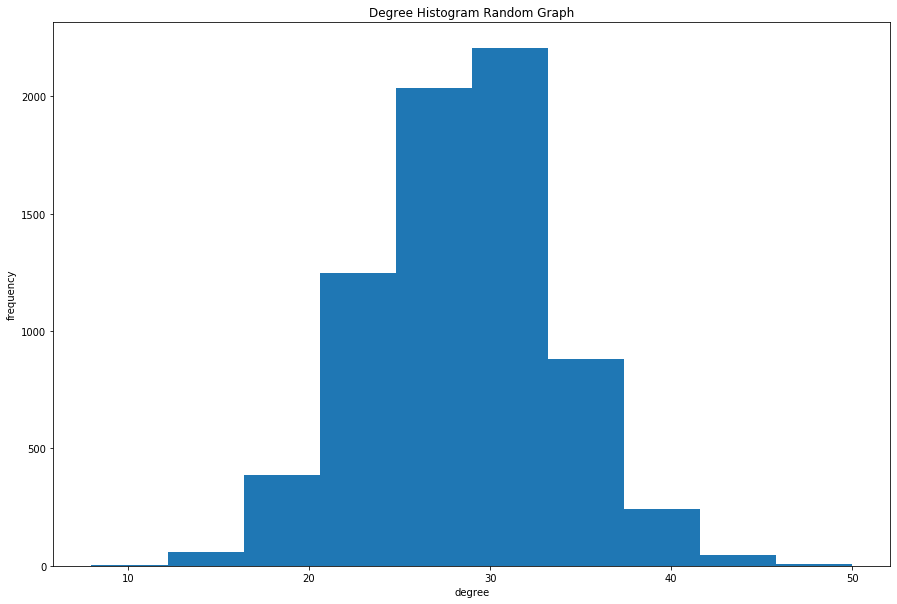

In [12]:
plt.figure(figsize=(15,10))

plt.hist(deg_seq_random_G)

plt.title('Degree Histogram Random Graph')
plt.xlabel('degree')
plt.ylabel('frequency')
plt.savefig('histogram_of_degrees_random_graph_G.png')
plt.show()

# Clustering Coefficient

##### Histograph Of Clustering coefficient 

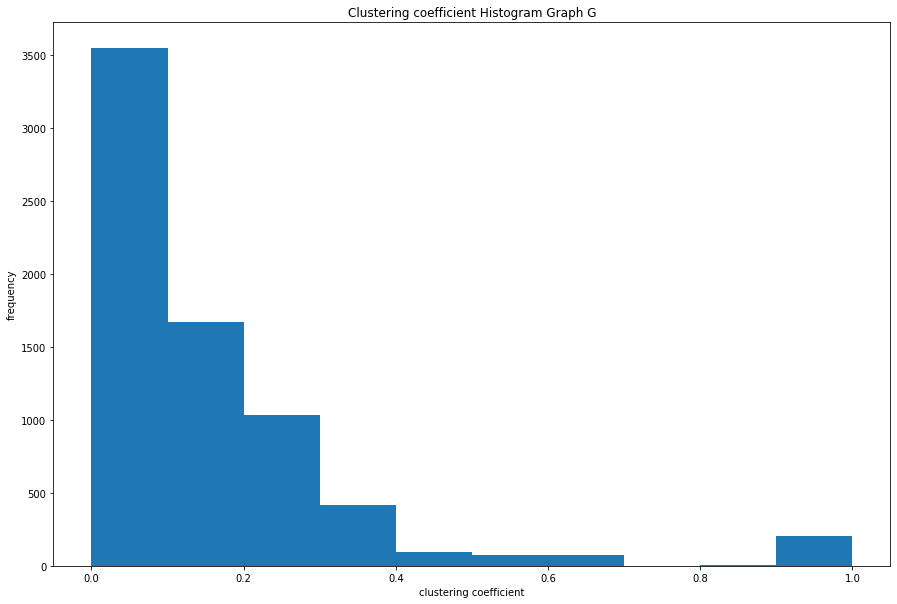

In [13]:
cluster_coeff_G = [cluster_coefficient_G[i] for i in cluster_coefficient_G]

plt.figure(figsize=(15,10))

plt.hist(cluster_coeff_G)

plt.title('Clustering coefficient Histogram Graph G')
plt.xlabel('clustering coefficient')
plt.ylabel('frequency')
plt.savefig('histogram_of_clustering_coefficient_graph_G.png')
plt.show()

In [14]:
print("The average clustering coefficient of graph G == ",average_clustering_coeff_G)

The average clustering coefficient of graph G ==  0.14089784589308738


##### Random Graph Clustering Coefficient

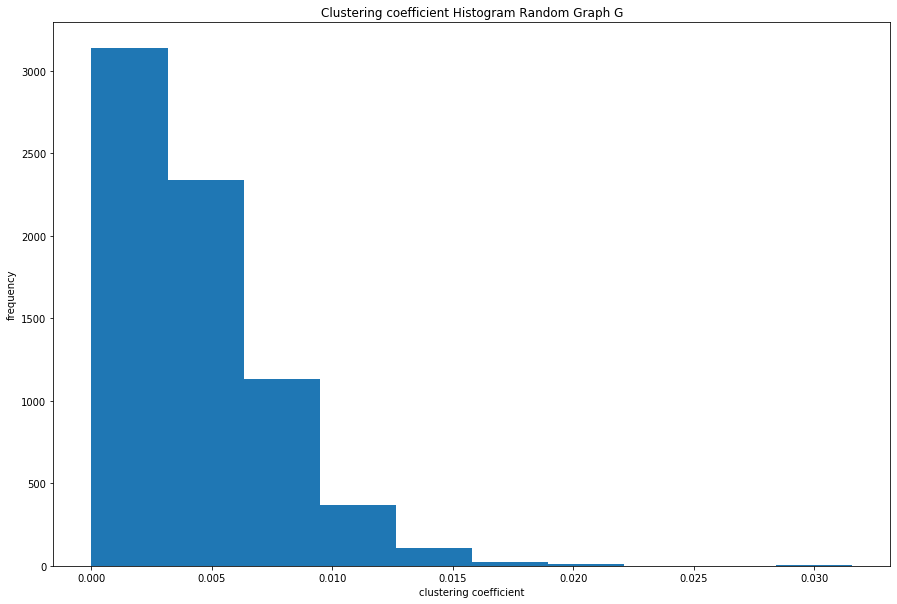

In [15]:
cluster_coeff_random_G = [cluster_coefficient_random_G[i] for i in cluster_coefficient_random_G]

plt.figure(figsize=(15,10))

plt.hist(cluster_coeff_random_G)

plt.title('Clustering coefficient Histogram Random Graph G')
plt.xlabel('clustering coefficient')
plt.ylabel('frequency')
plt.savefig('histogram_of_clustering_coefficient_random_graph_G.png')
plt.show()

In [16]:
print("The average clustering coefficient of random graph G == ",average_clustering_coeff_random_G)

The average clustering coefficient of random graph G ==  0.004072499130636474


## Distance

##### Histogram of distance in the graph 

In [17]:
print("Graph G is connected = ",nx.is_connected(G))

Graph G is connected =  False


In [18]:
components_connectec_graph_G = [c for c in sorted(nx.connected_components(G), key=len, reverse=True)]

In [19]:
print("""----------------Size of different sub graph connected in G---------------------""")
for i in range(len(components_connectec_graph_G)):
    print(len(components_connectec_graph_G[i]))

----------------Size of different sub graph connected in G---------------------
7066
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [20]:
# the node of G_sub_big
G_sub_big_node = sorted(list(components_connectec_graph_G[0]))

In [21]:
start_time = timer(None)
distance_list_G = list()

for i in range(len(G_sub_big_node)):
    for j in range(i+1, len(G_sub_big_node)):
        distance_list_G.append(nx.shortest_path_length(G,source=G_sub_big_node[i],target=G_sub_big_node[j]))
print("EXECUTION TIME ==",timer(start_time))

EXECUTION TIME == (0.0, 13.0, 25.97)


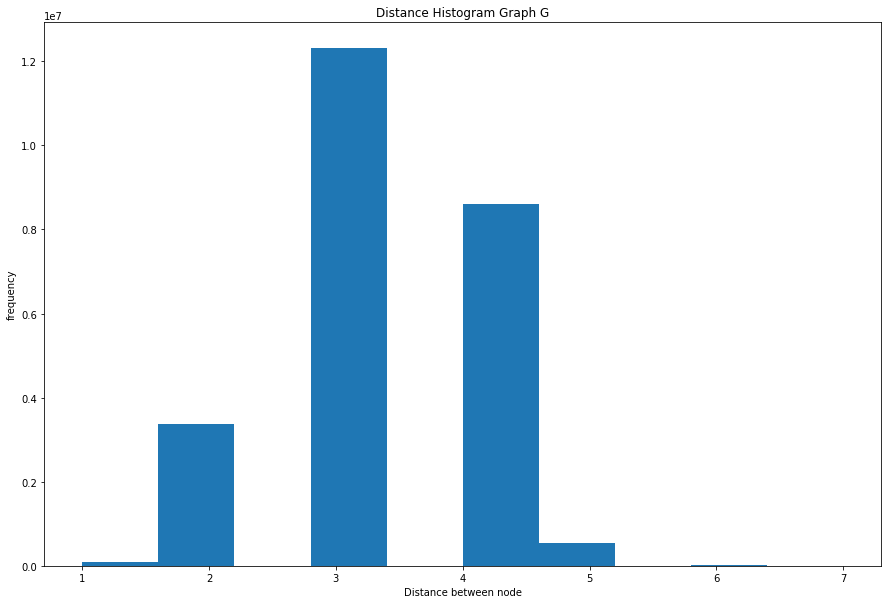

In [22]:
plt.figure(figsize=(15,10))

plt.hist(distance_list_G)

plt.title('Distance Histogram Graph G')
plt.xlabel('Distance between node')
plt.ylabel('frequency')
plt.savefig('histogram_of_distance_graph_G.png')
plt.show()

In [23]:
print("The Diametre of graph G == ",max(distance_list_G))

The Diametre of graph G ==  7


In [24]:
average_distance_G = sum(distance_list_G)/(number_of_node_G*(number_of_node_G-1))
print("The Average distance of graph G == ", average_distance_G)

The Average distance of graph G ==  1.6014653042282387


##### Histogram of distance in the Random graph 

In [25]:
print("Random Graph G is connected = ",nx.is_connected(random_G))
# The graph G is connected

Random Graph G is connected =  True


In [26]:
start_time = timer(None)
distance_list_random_G = list()

for i in range(number_of_node_G):
    for j in range(i+1, number_of_node_G):
        distance_list_random_G.append(nx.shortest_path_length(random_G,source=i,target=j))
print("EXECUTION TIME ==",timer(start_time))

EXECUTION TIME == (0.0, 25.0, 38.18)


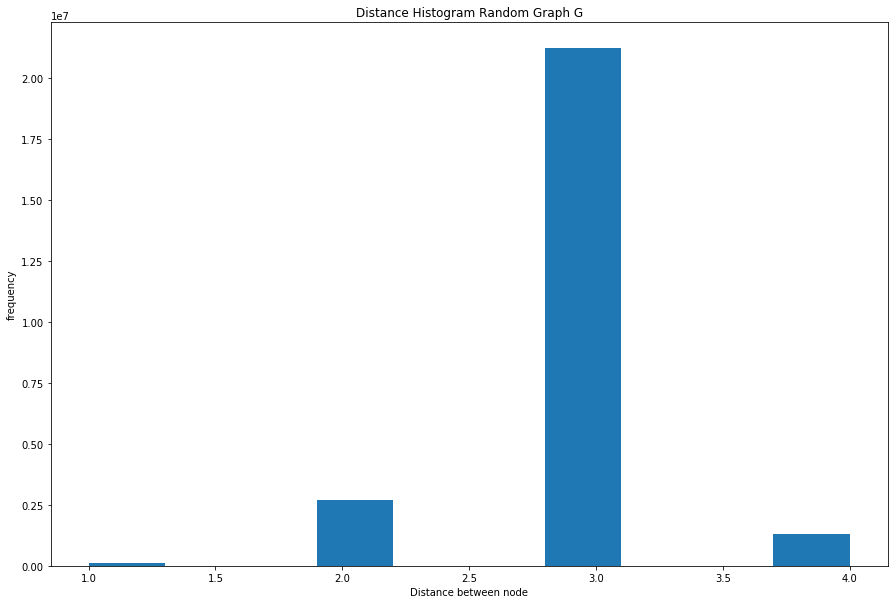

In [27]:
plt.figure(figsize=(15,10))

plt.hist(distance_list_random_G)

plt.title('Distance Histogram Random Graph G')
plt.xlabel('Distance between node')
plt.ylabel('frequency')
plt.savefig('histogram_of_distance_random_graph_G.png')
plt.show()

In [28]:
print("The Diametre of random graph G == ", max(distance_list_random_G))

The Diametre of random graph G ==  4


In [29]:
average_distance_random_G = sum(distance_list_random_G)/(number_of_node_G*(number_of_node_G-1))
print("The Average distance of random graph G == ", average_distance_random_G)

The Average distance of random graph G ==  1.468671496090869


##### Degree Correlation of the Graph

In [30]:
print("Degre correlation coefficient of wiki-vote graph is = ", nx.degree_pearson_correlation_coefficient(G))

Degre correlation coefficient of wiki-vote graph is =  -0.0830524827001641


# EXTRA REQUIREMENTS

##### Detect Communities

In [31]:
start_time = timer(None)
dendrogram=nx.community.greedy_modularity_communities(G)

# community
community_graph = dict()
k = 0
for x in dendrogram:
    #community_graph[k] = list()
    for j in x:
        #community_graph[k].append(j)
        community_graph[j] = k
    k+=1
    
print("EXECUTION TIME ==",timer(start_time))

EXECUTION TIME == (0.0, 2.0, 16.75)


In [32]:
# community
print(" Number of community = ",len(dendrogram))

 Number of community =  55


In [33]:
print("modularity = ", nx.community.modularity(G, dendrogram))

modularity =  0.3402034229619406


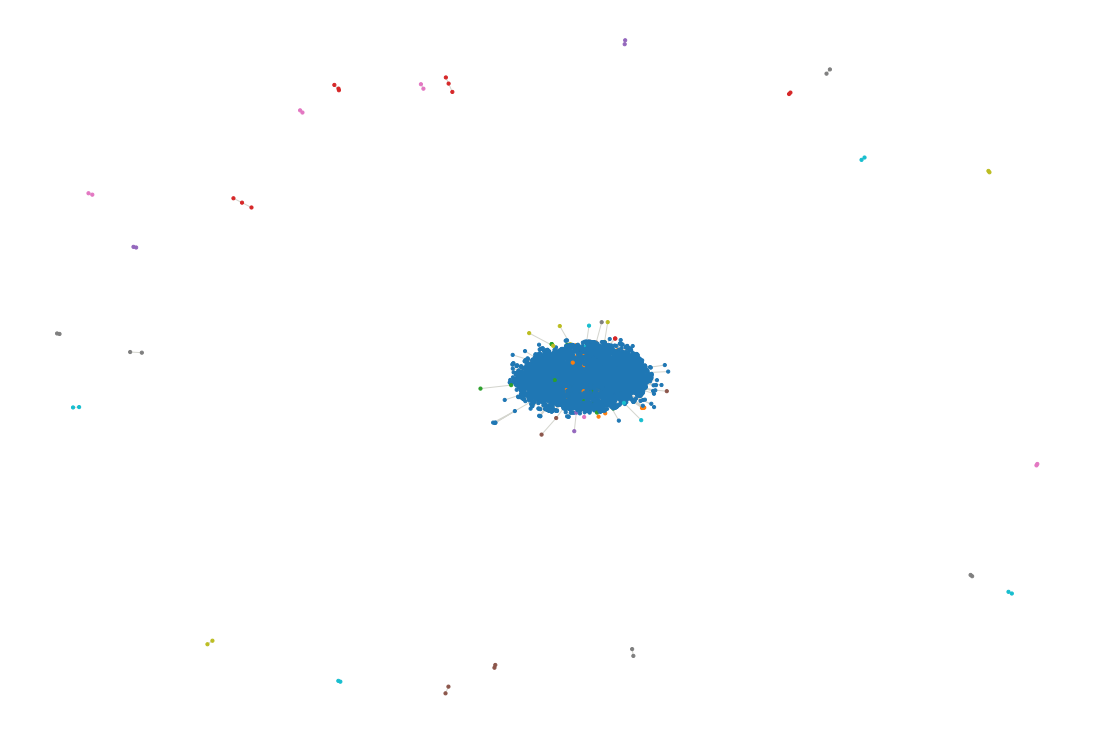

In [34]:
colors_test = [community_graph[n] for n in G.nodes()]
plt.figure(figsize=(15,10))

nx.draw_spring(G, node_color=colors_test, with_labels = False, cmap=plt.cm.tab10, node_size = 10, edge_color = "#D4D5CE")
plt.savefig('grady_optimized_community.png')

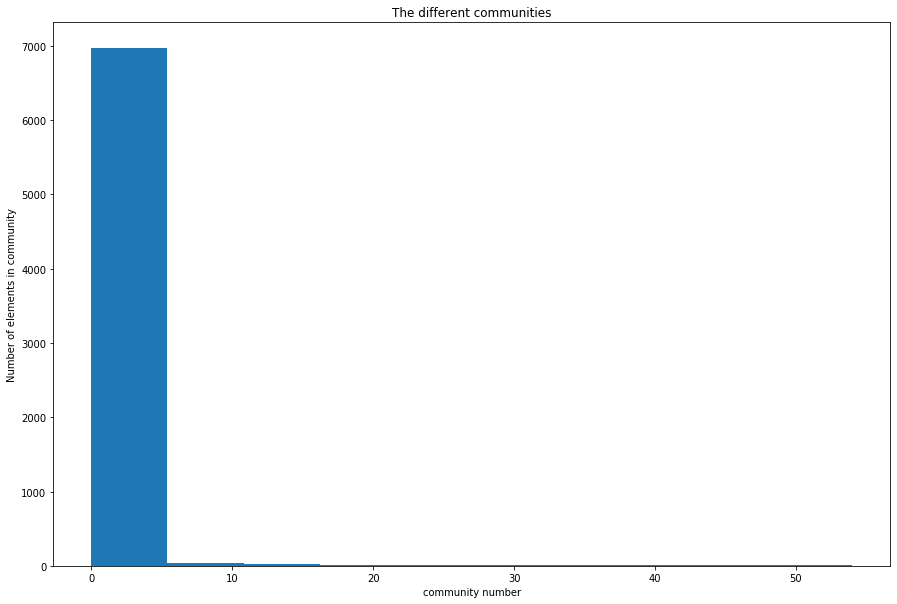

In [35]:
plt.figure(figsize=(15,10))

plt.hist(list(community_graph.values()))

plt.title('The different communities')
plt.xlabel('community number')
plt.ylabel('Number of elements in community')
plt.savefig('number_elements_per_communities.png')
plt.show()

##### The number of Triangle in the graph 

In [36]:
 nb_triangle_per_nodes_graph_G = nx.triangles(G, nodes=None)

In [37]:
print("The total number of triangle in our graph = ",sum(nb_triangle_per_nodes_graph_G.values())/3)

The total number of triangle in our graph =  608389.0


In [38]:
nb_triangle_per_nodes_random_graph_G = nx.triangles(random_G, nodes=None)

In [39]:
print("The total number of triangle of random graph G = ",sum(nb_triangle_per_nodes_random_graph_G.values())/3)

The total number of triangle of random graph G =  3775.0


##### Other centrality

In [40]:
# PageRank Centrality
start_time = timer(None)

c_pageank = nx.pagerank(G, alpha=0.9)

print("EXECUTION TIME ==",timer(start_time))

EXECUTION TIME == (0.0, 0.0, 3.68)


In [41]:
# Degree Centrality
start_time = timer(None)

c_degree = nx.degree_centrality(G)

print("EXECUTION TIME ==",timer(start_time))

EXECUTION TIME == (0.0, 0.0, 0.01)


In [42]:
# eigenvector centrality
start_time = timer(None)

c_eigenvector = nx.eigenvector_centrality(G)

print("EXECUTION TIME ==",timer(start_time))

EXECUTION TIME == (0.0, 0.0, 0.63)


In [43]:
# closeness centrality
start_time = timer(None)

c_closeness = nx.closeness_centrality(G)

print("EXECUTION TIME ==",timer(start_time))

EXECUTION TIME == (0.0, 10.0, 28.75)


In [44]:
# Betweenness Centrality
start_time = timer(None)

c_betweenness = nx.betweenness_centrality(G)

print("EXECUTION TIME ==",timer(start_time))

EXECUTION TIME == (0.0, 11.0, 20.98)


In [45]:
cent_df = pd.DataFrame.from_dict([c_pageank, c_degree, c_eigenvector, c_closeness, c_betweenness])
cent_df = pd.DataFrame.transpose(cent_df)
cent_df.columns = ['Page Rank', 'Degree', 'Eigen Vector', 'Closeness', 'Betweeness']
cent_df.sort_values('Page Rank', ascending = False)[:20]

,Page Rank,Degree,Eigen Vector,Closeness,Betweeness
2565,0.004615,0.149705,0.157688,0.487415,0.061258
11,0.003222,0.104442,0.089592,0.448816,0.035690
766,0.003217,0.108659,0.130151,0.466915,0.025352
457,0.003160,0.102896,0.110001,0.466605,0.035485
1549,0.003090,0.104020,0.129399,0.465861,0.026133
1166,0.002882,0.096711,0.119511,0.465676,0.024466
4037,0.002742,0.065645,0.063158,0.420719,0.028563
2688,0.002573,0.086871,0.110071,0.441835,0.013459
1374,0.002285,0.074923,0.086940,0.450140,0.019114
5524,0.002200,0.069581,0.073867,0.428296,0.009985


In [46]:
# Ordinate using degree column
cent_df = pd.DataFrame.from_dict([c_pageank, c_degree, c_eigenvector, c_closeness, c_betweenness])
cent_df = pd.DataFrame.transpose(cent_df)
cent_df.columns = ['Page Rank', 'Degree', 'Eigen Vector', 'Closeness', 'Betweeness']
cent_df.sort_values('Degree', ascending = False)[:20]

,Page Rank,Degree,Eigen Vector,Closeness,Betweeness
2565,0.004615,0.149705,0.157688,0.487415,0.061258
766,0.003217,0.108659,0.130151,0.466915,0.025352
11,0.003222,0.104442,0.089592,0.448816,0.035690
1549,0.003090,0.104020,0.129399,0.465861,0.026133
457,0.003160,0.102896,0.110001,0.466605,0.035485
1166,0.002882,0.096711,0.119511,0.465676,0.024466
2688,0.002573,0.086871,0.110071,0.441835,0.013459
1374,0.002285,0.074923,0.086940,0.450140,0.019114
1151,0.002181,0.072674,0.087194,0.444044,0.014161
5524,0.002200,0.069581,0.073867,0.428296,0.009985


In [47]:
# Ordinate using Eigen Vector column
cent_df = pd.DataFrame.from_dict([c_pageank, c_degree, c_eigenvector, c_closeness, c_betweenness])
cent_df = pd.DataFrame.transpose(cent_df)
cent_df.columns = ['Page Rank', 'Degree', 'Eigen Vector', 'Closeness', 'Betweeness']
cent_df.sort_values('Eigen Vector', ascending = False)[:20]

,Page Rank,Degree,Eigen Vector,Closeness,Betweeness
2565,0.004615,0.149705,0.157688,0.487415,0.061258
766,0.003217,0.108659,0.130151,0.466915,0.025352
1549,0.003090,0.104020,0.129399,0.465861,0.026133
1166,0.002882,0.096711,0.119511,0.465676,0.024466
2688,0.002573,0.086871,0.110071,0.441835,0.013459
457,0.003160,0.102896,0.110001,0.466605,0.035485
3352,0.002070,0.067051,0.091786,0.428662,0.009672
11,0.003222,0.104442,0.089592,0.448816,0.035690
1151,0.002181,0.072674,0.087194,0.444044,0.014161
1374,0.002285,0.074923,0.086940,0.450140,0.019114


In [48]:
# Ordinate using Closeness column
cent_df = pd.DataFrame.from_dict([c_pageank, c_degree, c_eigenvector, c_closeness, c_betweenness])
cent_df = pd.DataFrame.transpose(cent_df)
cent_df.columns = ['Page Rank', 'Degree', 'Eigen Vector', 'Closeness', 'Betweeness']
cent_df.sort_values('Closeness', ascending = False)[:20]

,Page Rank,Degree,Eigen Vector,Closeness,Betweeness
2565,0.004615,0.149705,0.157688,0.487415,0.061258
766,0.003217,0.108659,0.130151,0.466915,0.025352
457,0.003160,0.102896,0.110001,0.466605,0.035485
1549,0.003090,0.104020,0.129399,0.465861,0.026133
1166,0.002882,0.096711,0.119511,0.465676,0.024466
1374,0.002285,0.074923,0.086940,0.450140,0.019114
11,0.003222,0.104442,0.089592,0.448816,0.035690
1151,0.002181,0.072674,0.087194,0.444044,0.014161
2688,0.002573,0.086871,0.110071,0.441835,0.013459
2485,0.001837,0.061147,0.083808,0.434502,0.008669


In [49]:
# Ordinate using Betweeness column
cent_df = pd.DataFrame.from_dict([c_pageank, c_degree, c_eigenvector, c_closeness, c_betweenness])
cent_df = pd.DataFrame.transpose(cent_df)
cent_df.columns = ['Page Rank', 'Degree', 'Eigen Vector', 'Closeness', 'Betweeness']
cent_df.sort_values('Betweeness', ascending = False)[:20]

,Page Rank,Degree,Eigen Vector,Closeness,Betweeness
2565,0.004615,0.149705,0.157688,0.487415,0.061258
11,0.003222,0.104442,0.089592,0.448816,0.035690
457,0.003160,0.102896,0.110001,0.466605,0.035485
4037,0.002742,0.065645,0.063158,0.420719,0.028563
1549,0.003090,0.104020,0.129399,0.465861,0.026133
766,0.003217,0.108659,0.130151,0.466915,0.025352
1166,0.002882,0.096711,0.119511,0.465676,0.024466
15,0.002130,0.056649,0.059601,0.424487,0.020044
1374,0.002285,0.074923,0.086940,0.450140,0.019114
2237,0.002057,0.054400,0.071475,0.419863,0.015059
